In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [78]:
data=pd.read_csv("housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1330000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [79]:
data.isnull().sum()
data = pd.get_dummies(data, drop_first=True)
data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1330000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [80]:
x = data.drop(['price'], axis = 1)
y = data['price']


In [81]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(x, y, test_size =0.2,random_state = 0)



In [82]:
import sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xtrain, ytrain)

LinearRegression()

In [83]:
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

In [84]:
df=pd.DataFrame(ytrain_pred,ytrain)
df=pd.DataFrame(ytest_pred,ytest)


In [85]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, ytest_pred)
print(mse)
mse = mean_squared_error(ytrain_pred,ytrain)
mse

989751325053.8788


1193947139895.7083

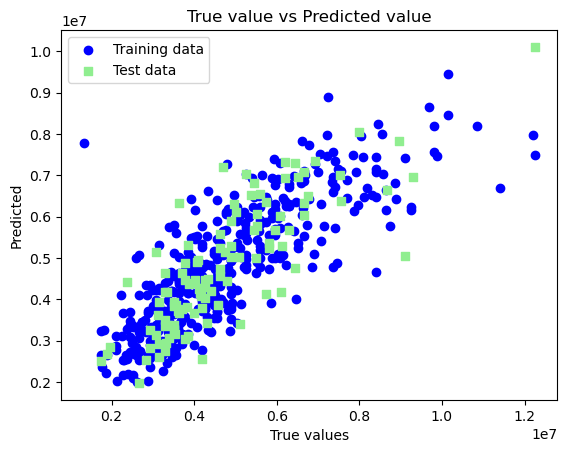

In [86]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
plt.plot()
plt.show() 